In [ ]:
#!pip install pyswarms
import pyswarms as ps
from google.colab import drive
import os
#Mount Google Drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Pricing-derivatives/vanilla-stock-options')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/LEARN/Finance/quantitative finance/Pricing-derivatives/vanilla-stock-options


# run modules

               Close      High       Low      Open    Volume
Price                                                       
2000-03-28  1.919621  1.953299  1.683878  1.885943  23025200
2000-03-29  2.020654  2.121686  2.020654  2.071171   9124500
2000-03-30  1.953300  2.037493  1.784911  2.020655   3688300
2000-03-31  1.970138  2.020654  1.953299  2.020654   3083300
2000-04-03  1.936460  1.970138  1.768073  1.885944   5897100
                Close       High        Low       Open   Volume
Price                                                          
2025-07-07  33.480000  33.700001  33.279999  33.700001  3981700
2025-07-08  33.599998  33.799999  33.570000  33.580002  4821200
2025-07-09  33.750000  33.750000  33.450001  33.660000  5031300
2025-07-10  33.419998  33.450001  33.220001  33.430000  4717300
2025-07-11  33.279999  33.310001  33.040001  33.139999  5074000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6360 entries, 2000-03-28 to 2025-07-11
Data columns (total 5 columns):
 

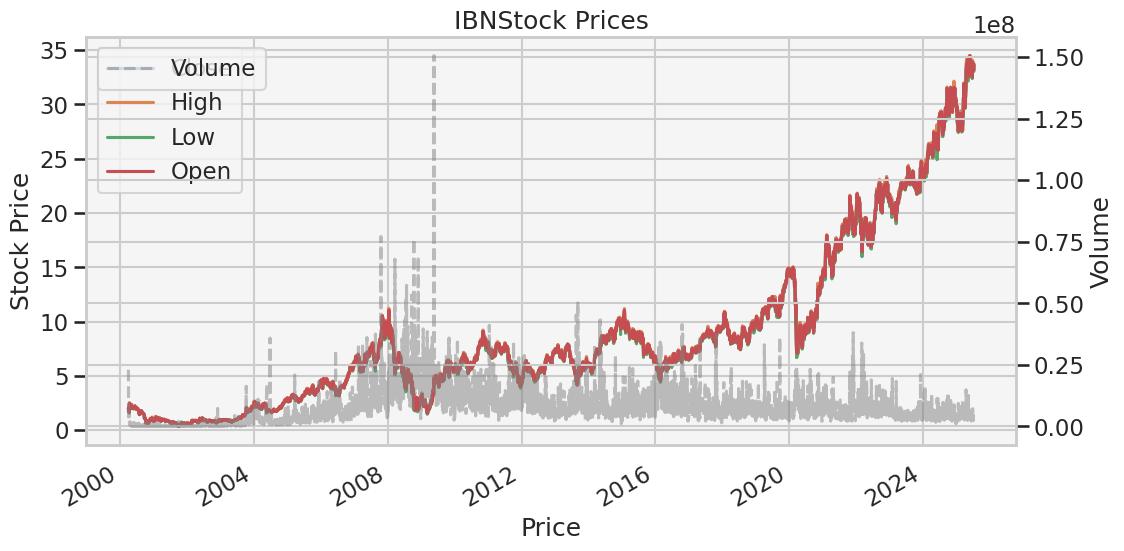

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6360 entries, 2000-03-28 to 2025-07-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6360 non-null   float64
dtypes: float64(1)
memory usage: 99.4 KB


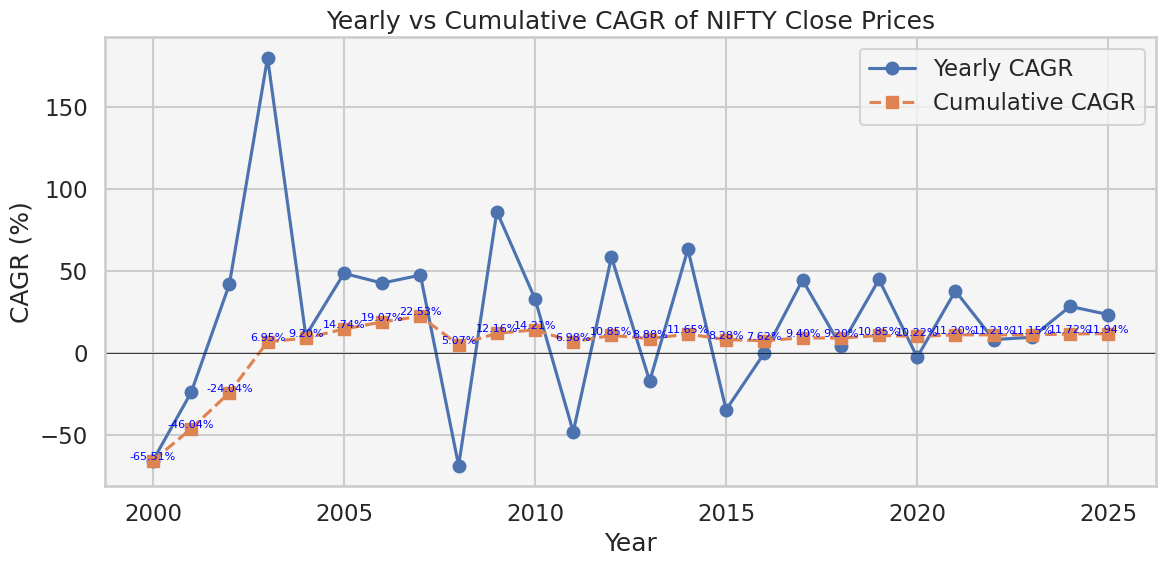

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     153 non-null    object        
 1   lastTradeDate      153 non-null    datetime64[ns]
 2   strike             153 non-null    int64         
 3   lastPrice          153 non-null    float64       
 4   bid                153 non-null    float64       
 5   ask                153 non-null    float64       
 6   change             153 non-null    int64         
 7   percentChange      153 non-null    int64         
 8   volume             129 non-null    float64       
 9   openInterest       153 non-null    int64         
 10  impliedVolatility  153 non-null    float64       
 11  inTheMoney         153 non-null    bool          
 12  contractSize       153 non-null    object        
 13  currency           153 non-null    object        
 14  Type      

In [ ]:
%run option_analysis.ipynb
%run loss_minimization.ipynb
%run bayesian_prior_posterior.ipynb
%run exact_binomial_model.ipynb
%run monte_carlo.ipynb
%run black_scholes_merton.ipynb
%run merton_jump_diffusion.ipynb
%run heston.ipynb
%run stock_option_data.ipynb
%run option_pricing.ipynb


predictor = OptionPredictor('IBN', '2020-01-01', date.today(), 'Close')
predictor.data_initiation()

# *NUMERICAL* SOLUTION - always underprocess

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


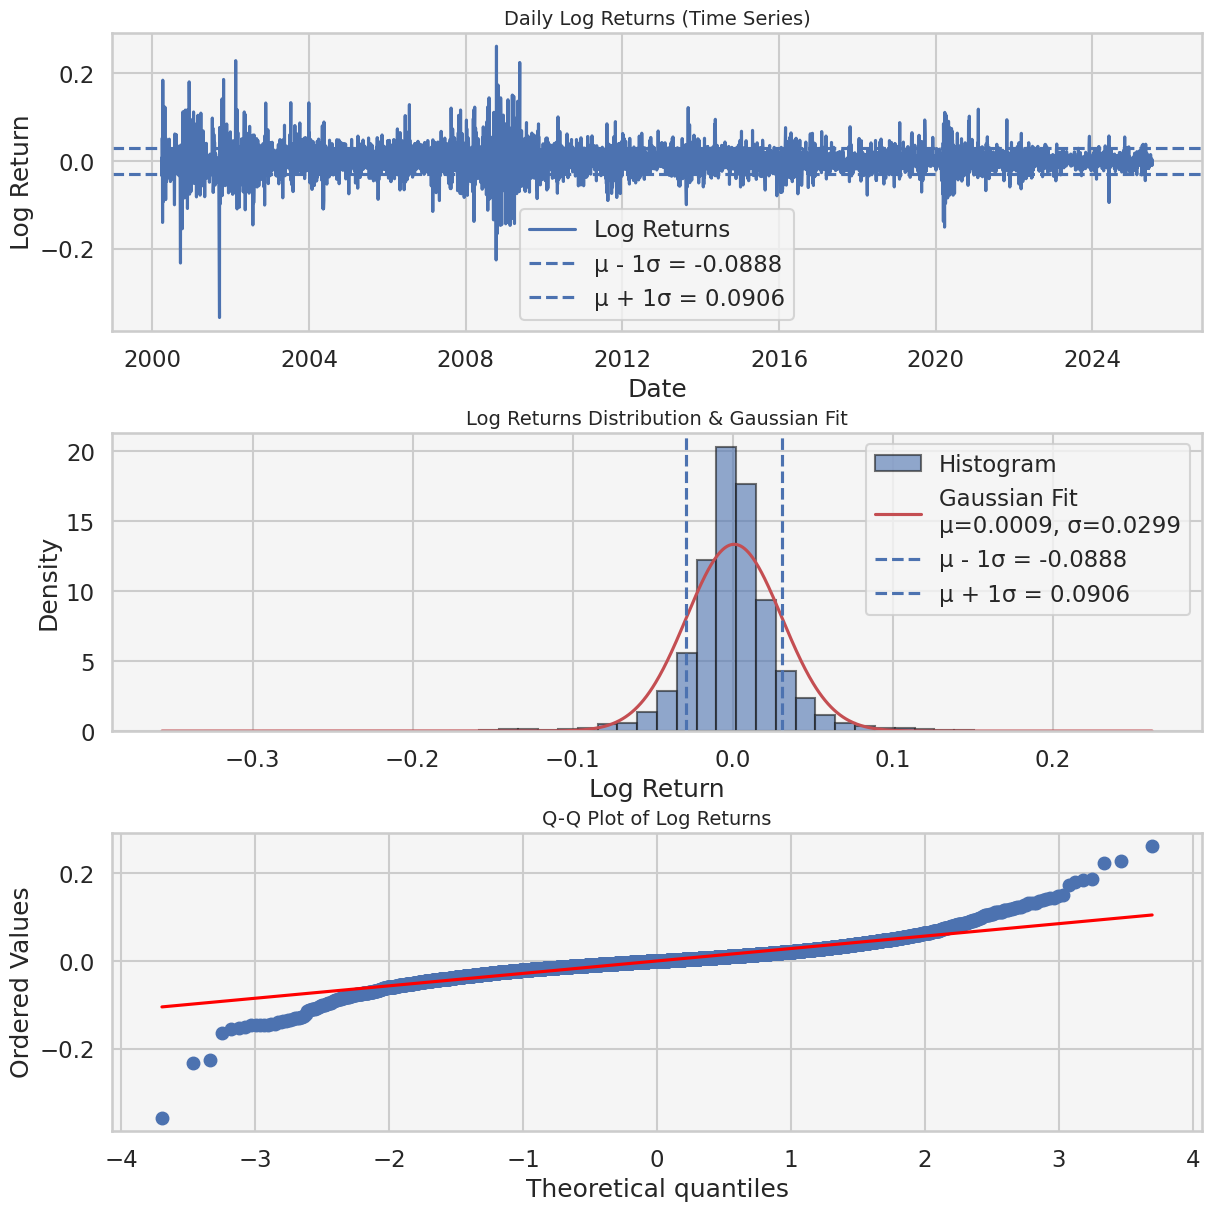

Characteristic function - Carr-Madan FFT -> Asset vs Strike--------------------------------------------------
Characteristic function - Fourier cosine expansion - COS FFT  --------------------------------------------------
  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_closed  cal_price_carr_madan  cal_price_COS  
0          4.317523              2.729843       4.317523  
1          3.357137              2.259573       3.357137  
2          7.523681              8.191357       7.523681  
3          8.701112              9.281970       8.701112  


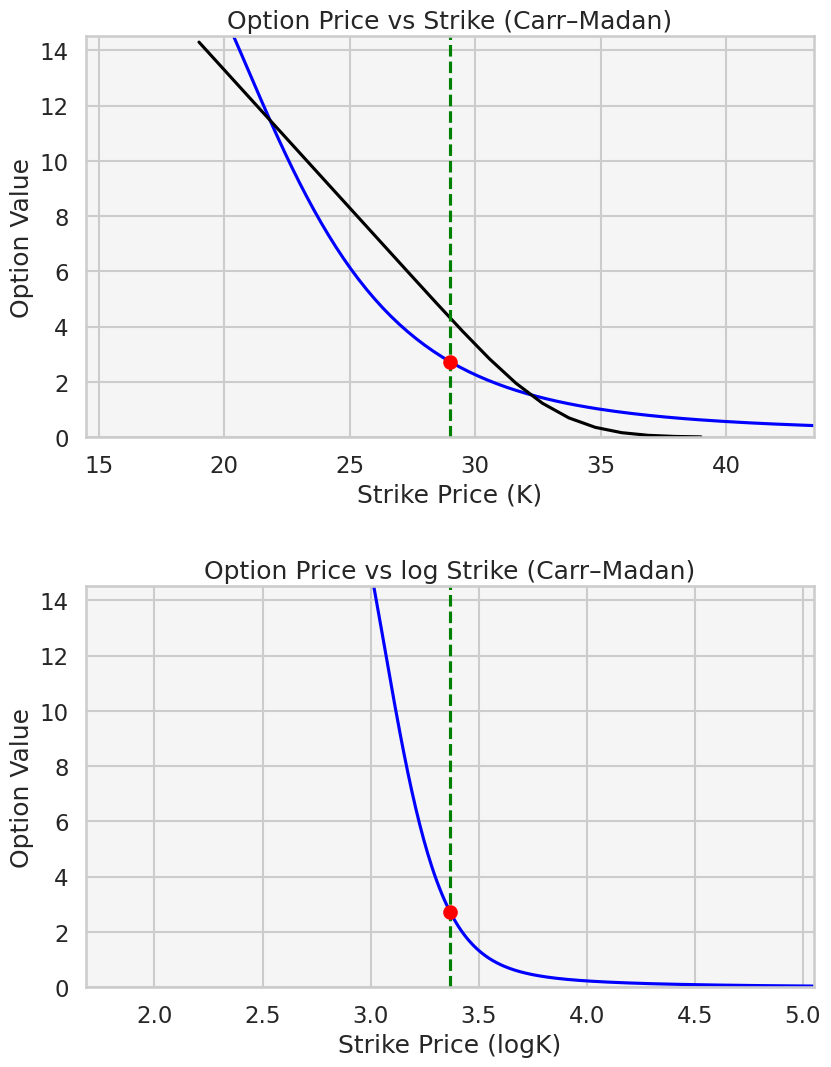

In [ ]:
predictor.run_sde_numerical_cf(model_type='BSM')

#Options available on model    : BSM , Merton , Heston
#Options available on exercise : european

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


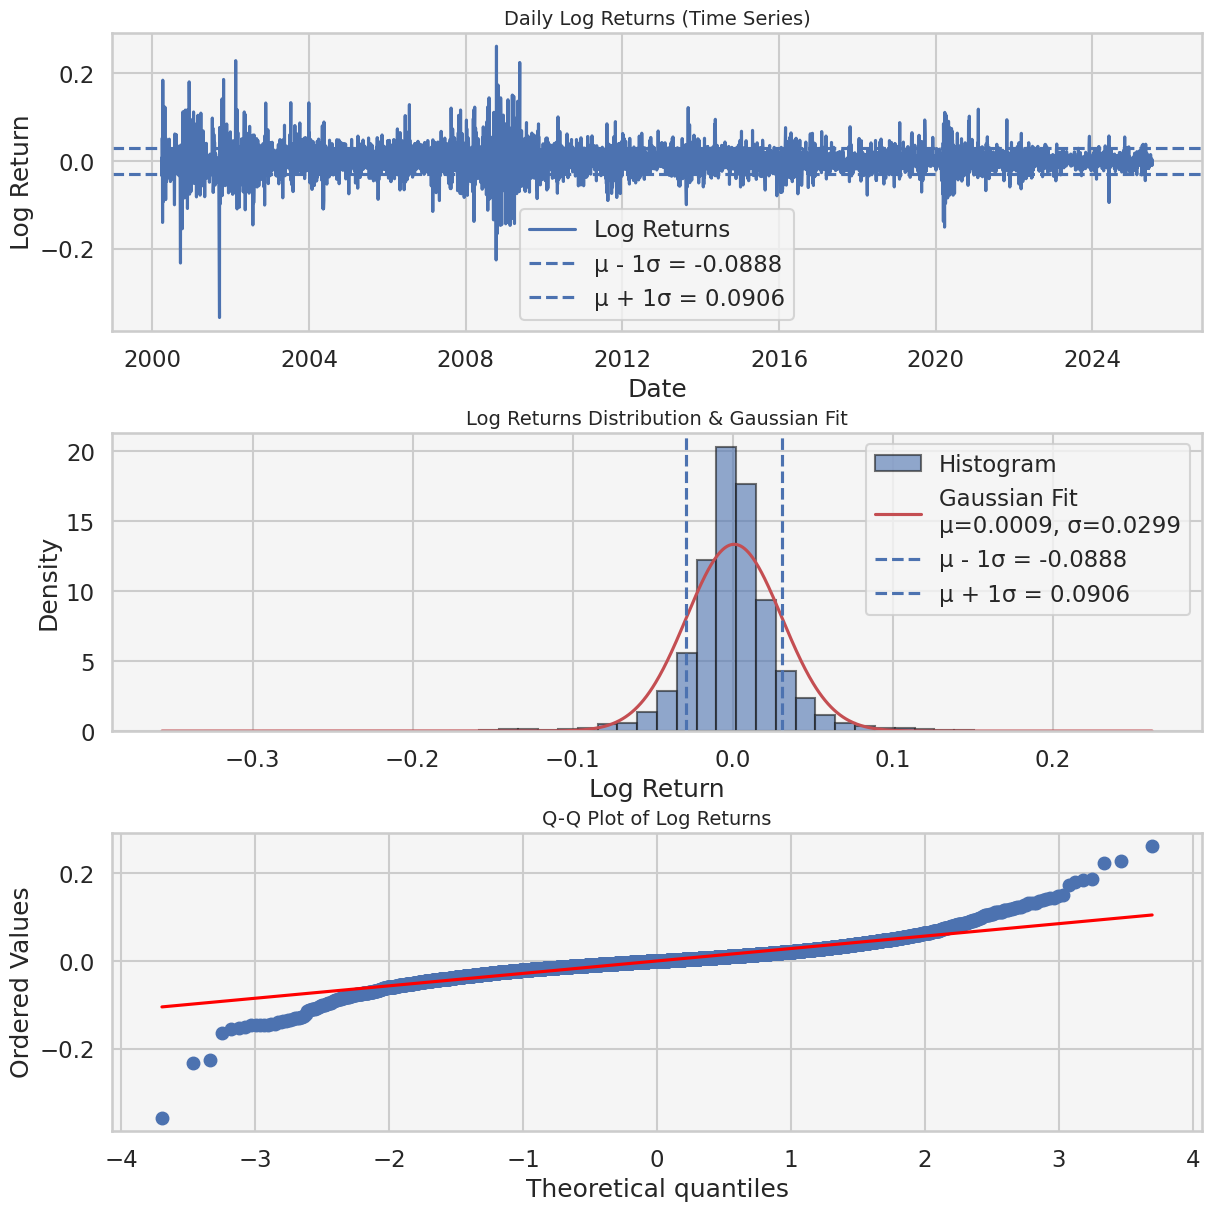

Crank-Nicholson PDE--------------------------------------------------
EXPLICIT PDE--------------------------------------------------
Implicit PDE--------------------------------------------------
  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_closed  cal_price_pde_cn  cal_price_pde_1  cal_price_pde_2  
0          4.317523          4.419336         4.319320         4.319328  
1          3.357137          3.525289         3.357581         3.357590  
2          7.523681          8.745065         7.448111         7.447847  
3          8.701112          9.765868         8.598755         8.598488  


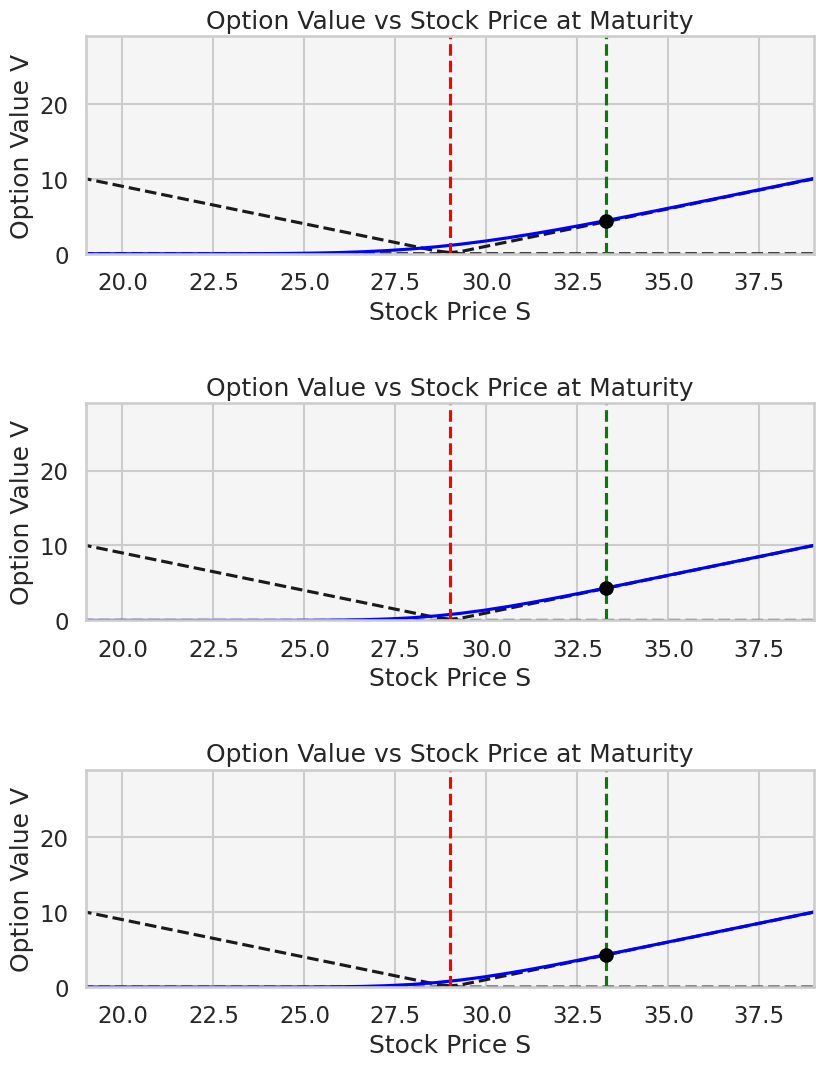

In [ ]:
predictor.run_sde_numerical_pde(model_type='BSM', exercise_type='european')

#Options available on model    : BSM , Merton , Heston
#Options available on exercise : european , american, bermudan

#* for bermudan, exercise dates are (by choice) the last two consecutive days before each (expiry -1) time


# *CLOSED* form solution - only european options

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


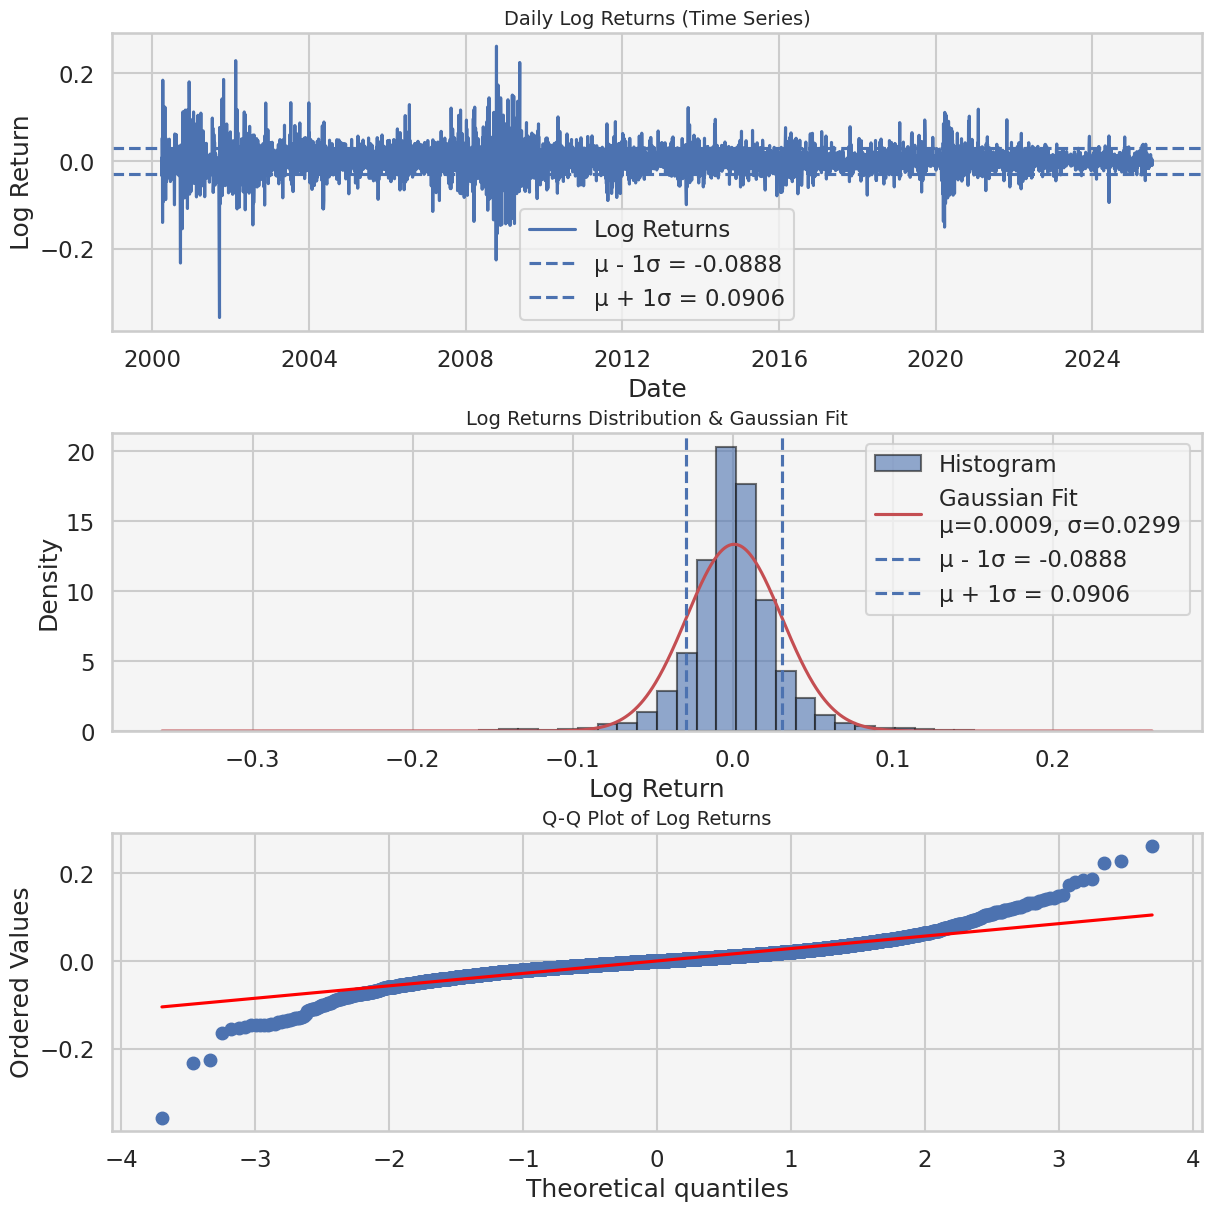

BSM 1973---------------------
  expirations option_type  strike  obs_price        IV  Maturity  cal_price  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   4.317523   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   3.357137   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   7.523681   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   8.701112   

      delta     gamma     theta      vega       rho  
0  0.982347  0.019573 -0.014189  0.002041  0.005630  
1  0.944938  0.050053 -0.029226  0.005219  0.005573  
2 -0.375333  0.019184 -0.006316  0.158040 -0.313724  
3 -0.411292  0.019677 -0.006183  0.162097 -0.350937  


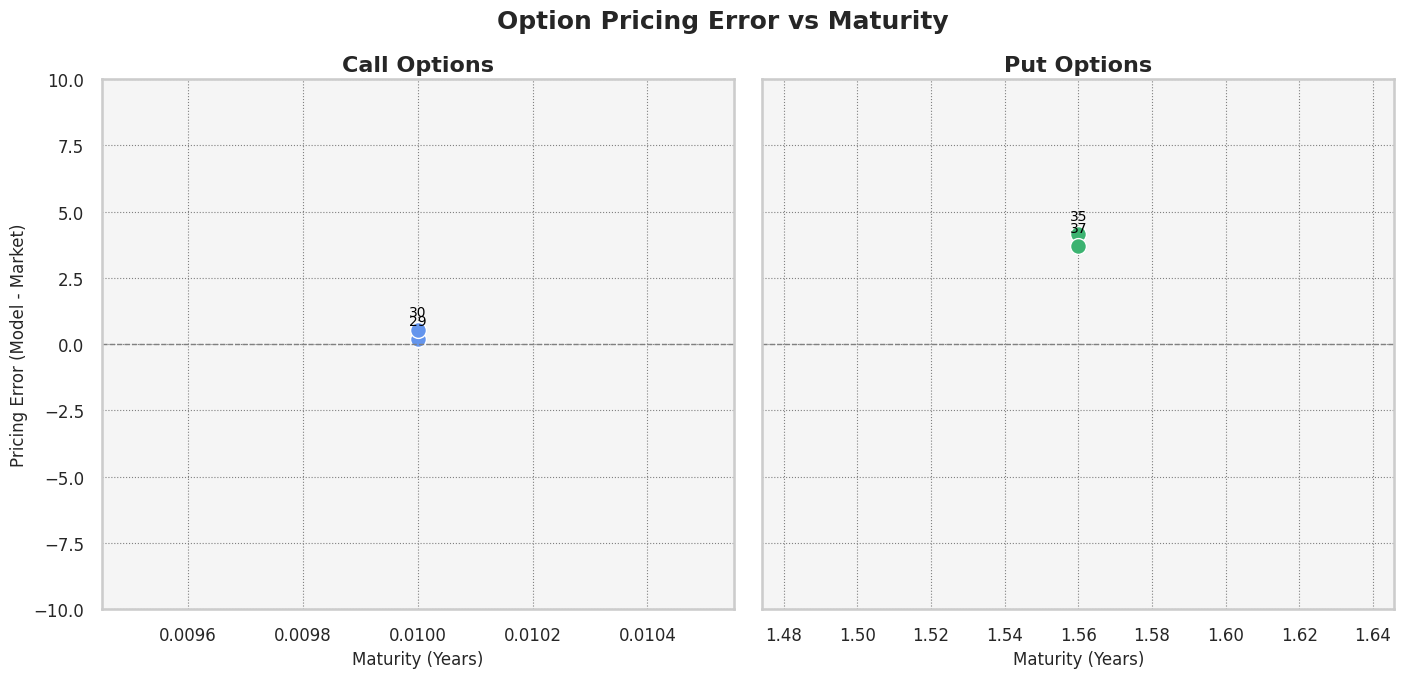

In [ ]:
predictor.run_sde_closed(model_type='BSM')

#Options available : BSM , Merton , Heston

# Option  Pricing : Exact binomial tree

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


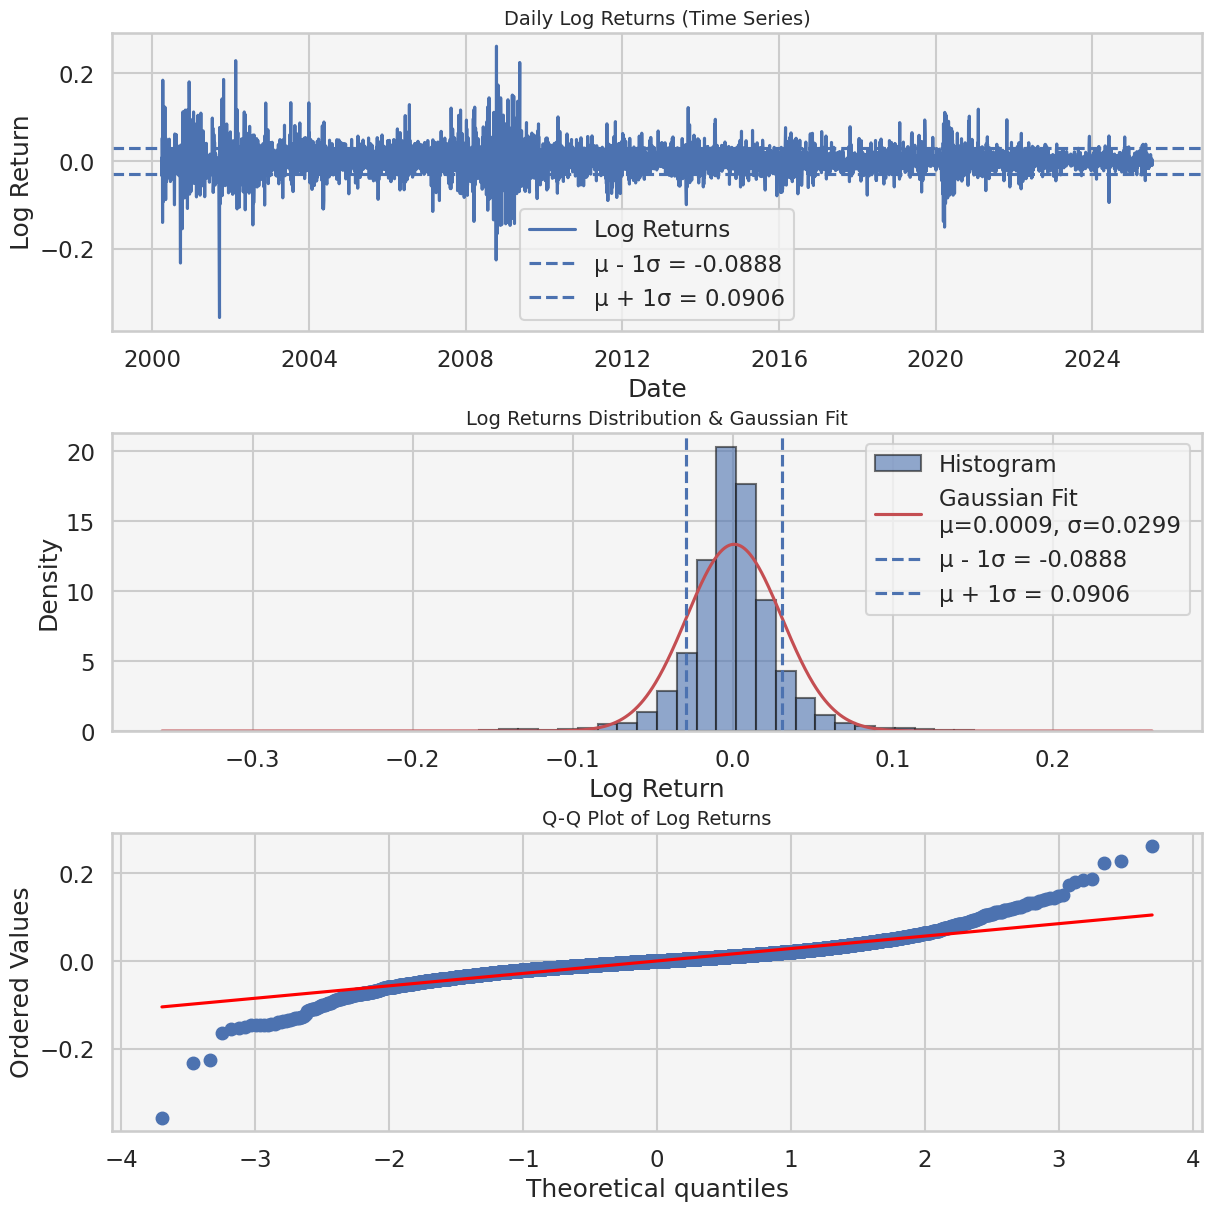

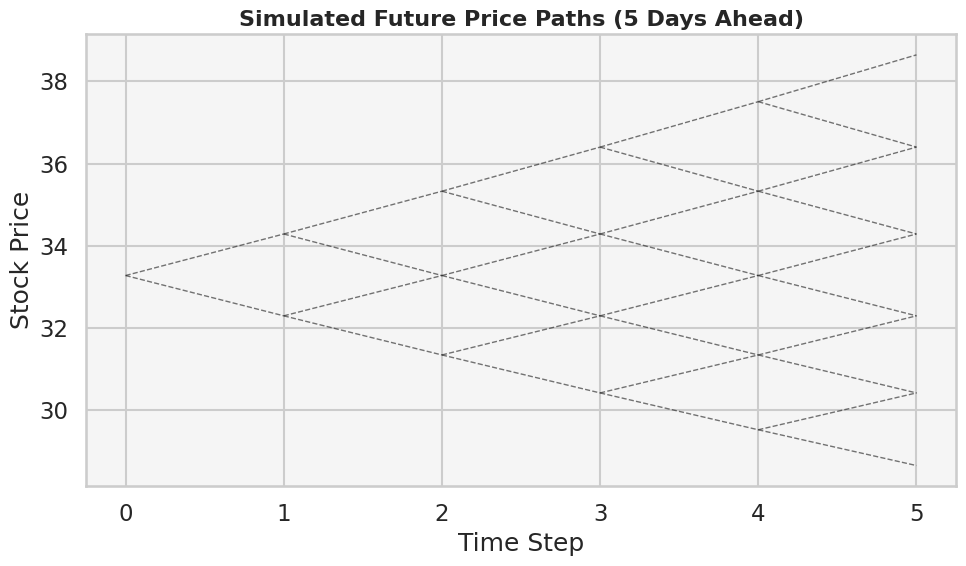

  expirations option_type  strike  obs_price        IV  Maturity  cal_price  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   4.314149   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   3.347701   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   7.527261   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   8.703645   

      delta     gamma       theta       vega        rho  
0  0.988905  0.011376 -240.396053   0.298066   0.567393  
1  0.956289  0.044820 -228.361691   0.304991   0.565032  
2 -0.375343  0.019193   94.487070  15.789383 -31.378473  
3 -0.411320  0.019689  103.397406  16.148391 -35.099148  


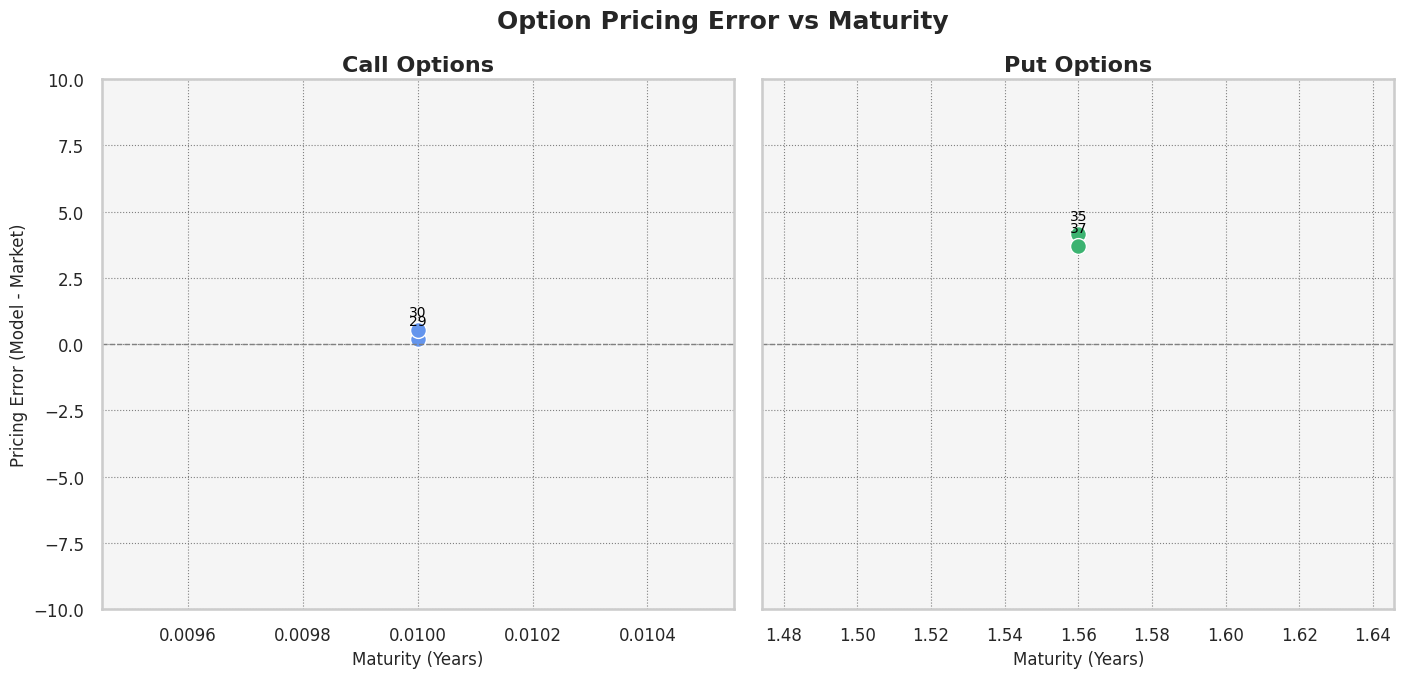

In [ ]:
predictor.run_btree(model_type='CRR', exercise_type='european')
#options available on model    - CRR
#options available on exercise - european , american, bermudan (fictitious exercise days)

# Option  Pricing : Monte Carlo simulations

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


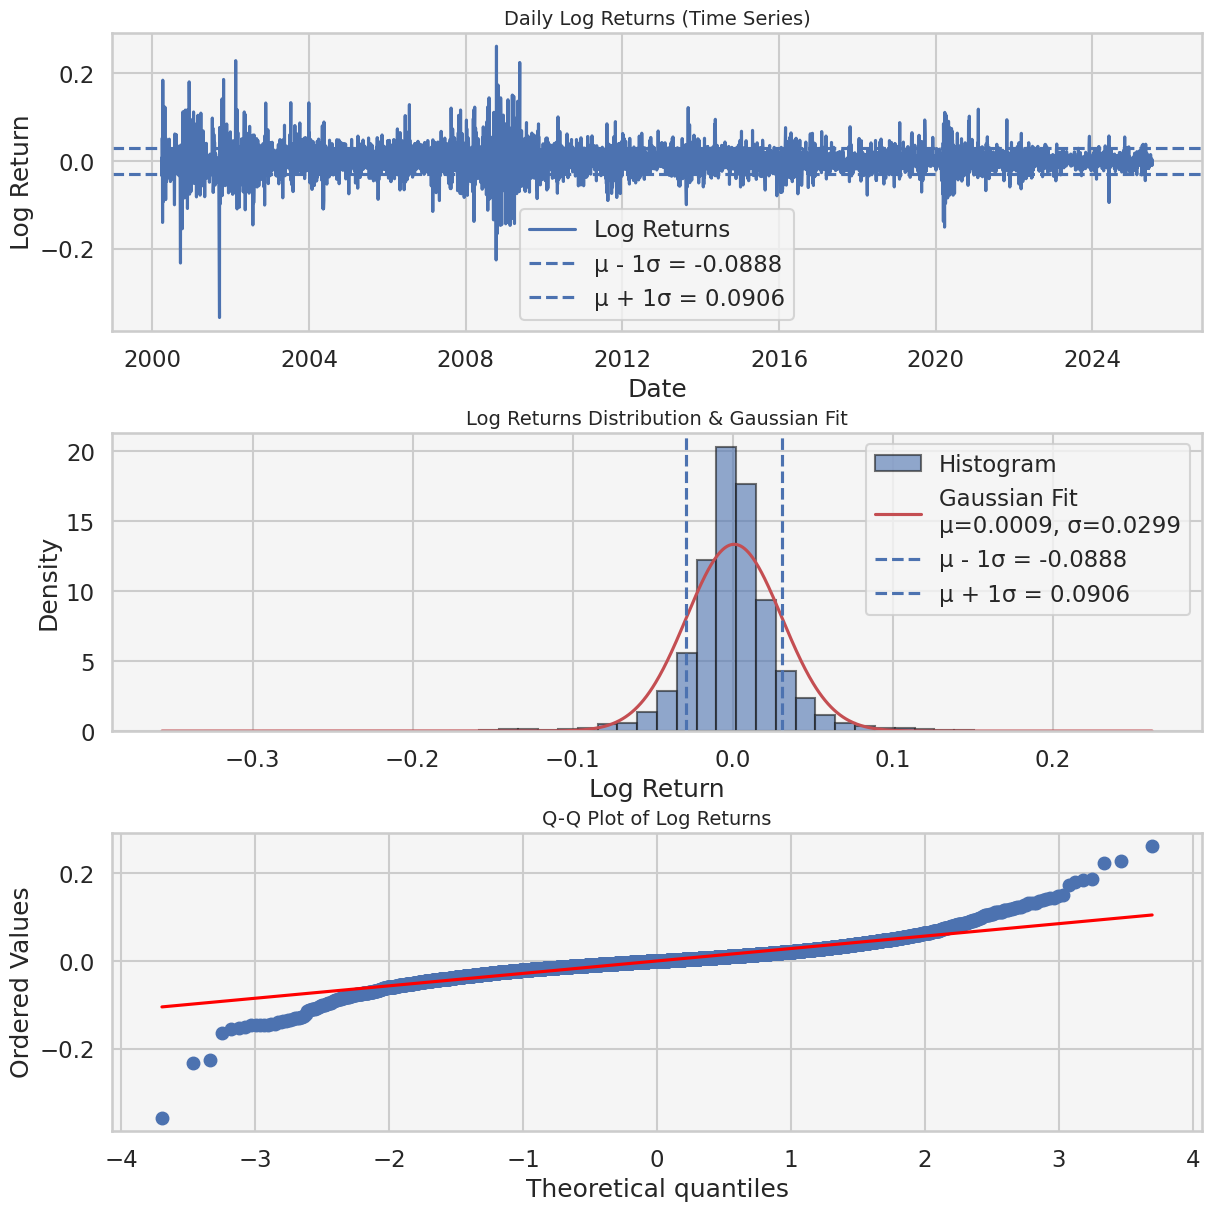

/tmp/ipython-input-45-4034027318.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simulated_prices[ii, t] = simulated_prices[ii, t - 1] * (1 + self.rfr * dt + sigma_sample * np.sqrt(dt) * z)


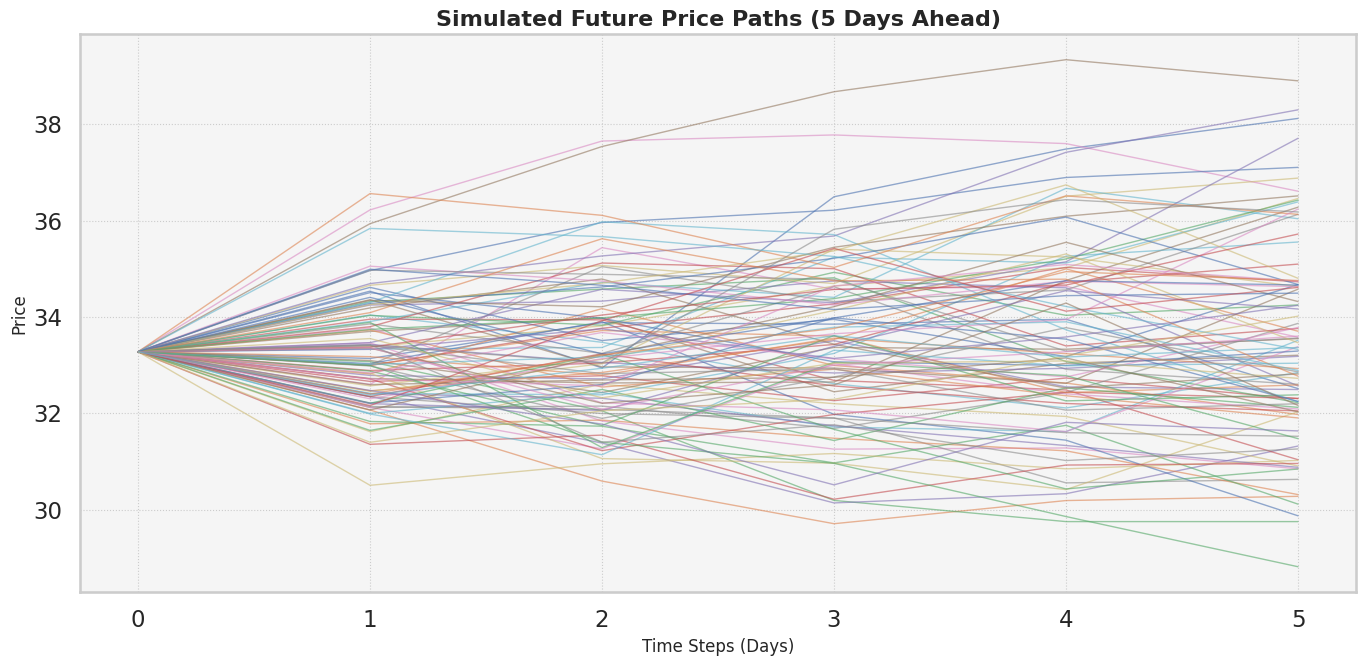

  expirations option_type  strike  obs_price        IV  Maturity  cal_price  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   4.474635   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   3.489109   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   7.896610   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   9.079860   

      delta      gamma     theta        vega          rho  
0  1.299735  -8.187622  0.000672   25.310094  -687.644684  
1  1.021907   0.850760  0.001069  -58.915459  1975.406025  
2 -3.485290 -10.960427  0.001185  164.344101 -6713.792386  
3  1.282831   9.486686 -0.000018  -32.535456  4538.458939  


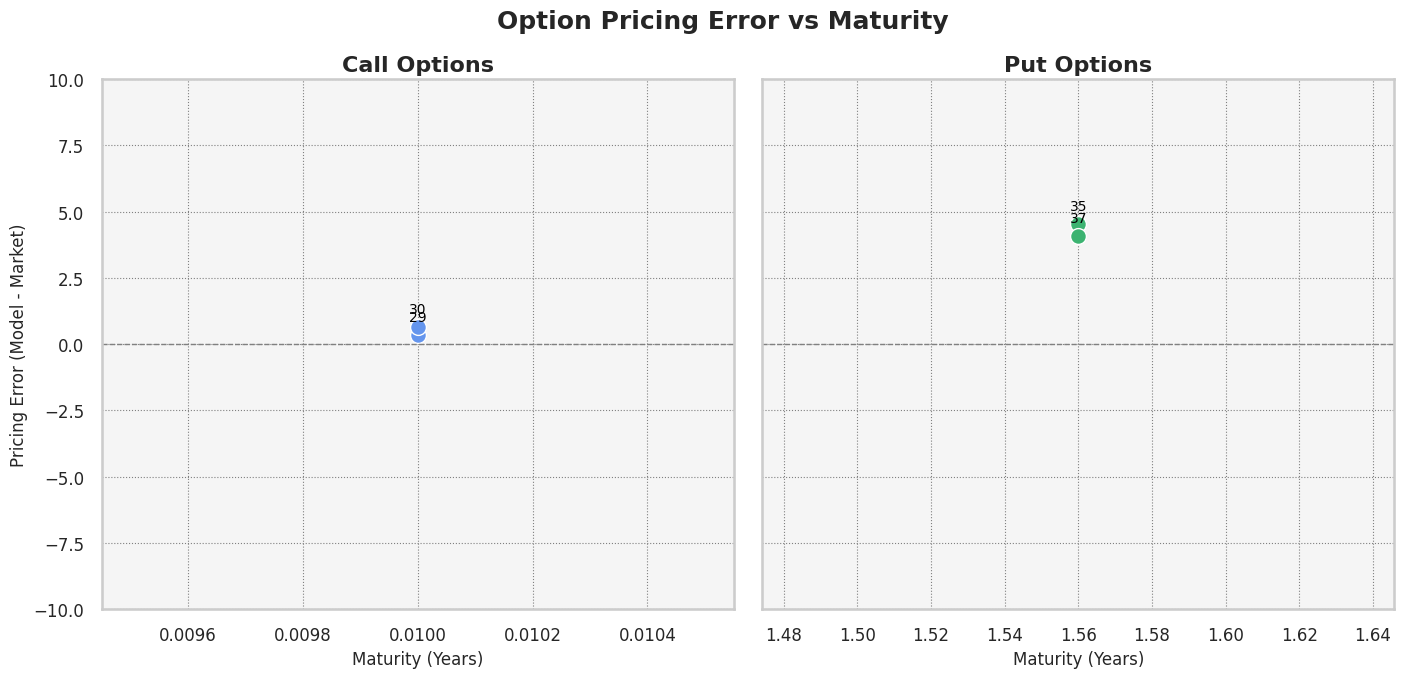

In [ ]:
predictor.run_mcmc(npath = 100, model_type='BSM', exercise_type='european')

#options available on model    -  btree , BSM , Merton , Heston
#options available on exercise - european , american, bermudan(fictitious exercise days)

# for Heston - params are calculated using loss minimization via particle swarm optimization (loss = market vs model option price) : WIP